In [48]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm

from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split








In [42]:
n_class = 3
n_sample_per_class = 100

X, y = make_blobs(
    n_samples=n_class * n_sample_per_class,
    n_features=2,
    centers=n_class,
    cluster_std=1,
)
two_blobs_data = pd.DataFrame(X, columns=list("xy"))
two_blobs_data["label"] = y
two_blobs_data.head(5)

,x,y,label
0,-2.324272,3.875737,2
1,-0.930295,2.900523,2
2,-7.599650,9.924618,0
3,-2.319516,1.782877,2
4,-7.587887,8.069039,0


In [43]:
def scatter_plot(df):
    """
    assumption:
    
    df.columns = ["{x_label}", "{y_label}", "{label}"]
    """
    figure = plt.figure(figsize=(15, 10))
    axis = figure.add_subplot(1, 1, 1)
    
    c_x, c_y, c_l = df.columns
    
    labels = df[c_l].unique()
    labels.sort()
    
    for label in labels:
        sub_df = df[df[c_l] == label]
        line = axis.scatter(
            sub_df[c_x], sub_df[c_y], label=str(label),
        )

    axis.set_xlabel(c_x)
    axis.set_ylabel(c_y)
    axis.legend()
    axis.grid()
    plt.show()

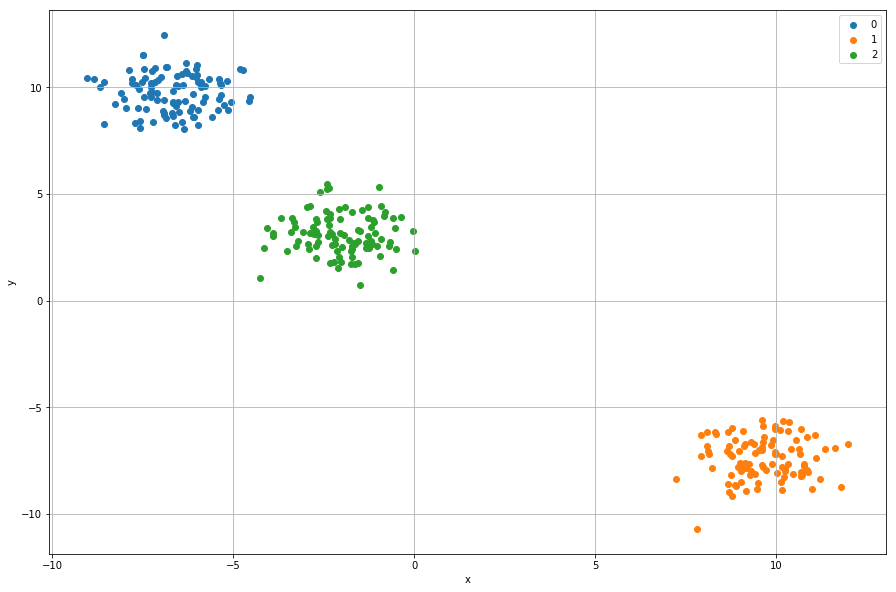

In [44]:
scatter_plot(two_blobs_data)

In [51]:
def train(df):
    """
    """
    c_features = df.columns[:-1] 
    c_label = df.columns[-1]
    
    mean_and_std_mapper = dict()
    for feature in c_features:
        s = df[feature]
        mean_and_std_mapper[feature] = (s.mean(), s.std())
    
    s = df[c_features[0]]
    print(s)
    print(norm.fit(s))
    
    
train(two_blobs_data)

0      -2.324272
1      -0.930295
2      -7.599650
3      -2.319516
4      -7.587887
5      -1.734559
6      -1.076442
7      -5.767797
8      -7.957887
9       8.228734
10     -2.419193
11     11.627770
12     -5.895368
13     10.468570
14     -1.643532
15     10.837996
16     11.357325
17     -7.808430
18     -7.581869
19      9.619617
20      9.964464
21     -7.278798
22     -7.100615
23     -6.654094
24     -0.510464
25      9.645460
26     -2.051591
27     -1.488289
28     11.221695
29     -6.540486
         ...    
270    -0.808652
271     9.492000
272    -6.121633
273    -3.684385
274     8.983701
275    -3.281932
276    -2.414169
277    -7.279975
278    10.420054
279    -6.920548
280     7.919579
281     9.166462
282    -2.330807
283    -7.635955
284    -1.989465
285    -2.616557
286    10.148434
287    -3.900663
288    -2.112742
289    10.322443
290    -1.016299
291    -0.370680
292    -0.928316
293     8.145964
294    -1.237142
295    10.208650
296    -0.982967
297    -7.2772